# DIP

In [1]:
(ns scenic-swamp
   (:require
     [opencv4.utils :as u]
     [opencv4.core :refer :all]))

nil

## enhance contrast

Enhancing contrast is done using the *equalize-hist* function. 

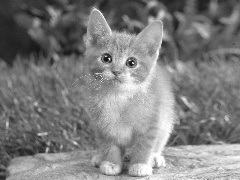

In [2]:
(def image 
  (->
  "resources/images/cat.jpg"
  (imread CV_8U)
  (u/resize-by 0.15)))

(u/>>> image)

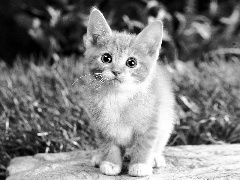

In [3]:
(-> image
 (equalize-hist!)
 (u/>>>))

In [4]:

; ENHANCE BRIGHTNESS
(->
  (imread "resources/images/cat.jpg")
  ; rtype (-1 to match src) alpha (multiply by) beta (then add)
  (convert-to! -1 2 0)
  (imwrite "output/cat.png"))

; ENHANCE SHARPNESS
(def neko (imread "resources/images/cat.jpg"))
(def dest (u/mat-from neko))
(gaussian-blur neko dest (new-size 0 0) 10)
; this adds two mats, each with a weighted value,
; gamma(here 0) is then added
(add-weighted neko 1.5 dest -0.5 0 dest)
(imwrite dest "output/cat.png")

; merge two images
(def n1 (imread "resources/images/cat2.png" CV_8UC1))
(def n2 (imread "resources/images/cat3.png" CV_8UC1))
(def dest (u/mat-from n1))
(add-weighted n1 0.5 n2 0.8 0 dest)
(imwrite dest "output/cat.png")

; ADD BORDER_REFLECT
(->
  (clone dest)
  (copy-make-border!
    100
    100
    100
    100
    BORDER_WRAP)
  (imwrite "output/cat.png"))

; ERODE
(def erosion-size 5)
(->
  (imread "resources/images/cat2.png")
  (erode!
    (get-structuring-element
      MORPH_RECT
      (new-size (inc (* 2 erosion-size)) (inc (* 2 erosion-size)))))
  (imwrite "output/cat.png"))

; DILATE
(def dilation-size 3)
(->
  (imread "resources/images/cat2.png")
  (dilate!
    (get-structuring-element
      MORPH_RECT
      (new-size (inc (* 2 dilation-size)) (inc (* 2 dilation-size)))))
  (imwrite "output/cat.png"))


#object[org.opencv.core.Mat 0x7255a8f5 "Mat [ 781*1000*CV_8UC3, isCont=true, isSubmat=false, nativeObj=0x7f63401c2970, dataAddr=0x7f6341594fc0 ]"]